Econ ProbSet 2

John Stachurski

Kendra Robbins 

# HW1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg as ln

Exercise 1

In [24]:
X = np.loadtxt("matrix_data.txt")
N = X.shape[0]

In [21]:
eigvals = ln.eigvals(X)
spectral_radius = max(abs(eigvals))
print("The spectral radius is:", round(spectral_radius, 6))

The spectral radius is: 1.004428


In [29]:
v = np.exp(np.random.randn(N))
max_iter = 1000
iter_spectral_radius = np.zeros(max_iter)
for i in range(1, max_iter + 1):
    X_pwr = np.linalg.matrix_power(X, i)
    X_mult = np.matmul(X_pwr, v)
    iter_spectral_radius[i-1] = ln.norm(X_mult)**(1/i)

<Figure size 432x288 with 0 Axes>

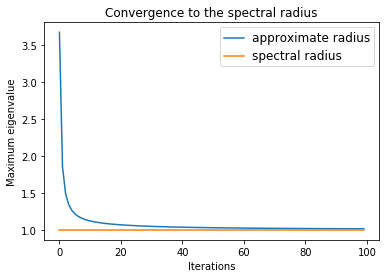

In [30]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(iter_spectral_radius[:], label = 'approximate radius')
ax.plot([spectral_radius] * max_iter, label = 'spectral radius')
legend = ax.legend(loc='upper right', shadow=False)
for label in legend.get_texts():
    label.set_fontsize('large')
plt.xlabel('Iterations')
plt.ylabel('Maximum eigenvalue')
plt.title('Convergence to the spectral radius')
plt.show()

Exercise 2

In [3]:
from numba import njit

In [4]:
@njit
def quadratic():
    n = 100000                
    x = np.zeros(n)            
    x[0] = np.random.uniform(0, 1)  
    for t in range(n - 1):
        x[t + 1] = 4 * x[t] * (1 - x[t])
    return x

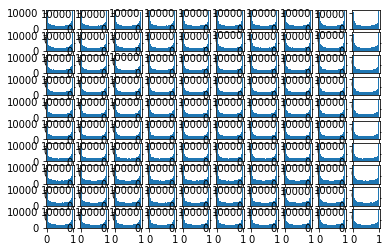

In [7]:
for i in range(100):
    k = i+1
    x = quadratic()
    plt.subplot(10,10,k)
    plt.hist(x, bins='auto')
plt.show()

All of the histograms look similar.

Exercise 3



Suppose $( \mathbb{X}, g)$ is a dynamical system, $g$ is continuous at $\hat x \in \mathbb{X}$, and $\exists x \in \mathbb{X} $ such that $g^t(x) \rightarrow \hat x$.


$lim_{t\rightarrow \infty} g^t(x) = \hat x \Rightarrow lim_{t\rightarrow \infty} g^{t-1}(x) = \hat x$. 

Since $lim_{t\rightarrow \infty} g^t(x) = \hat x$ and $g$ continuous at $\hat x$: 

$$lim_{t\rightarrow \infty} g^t(x) = g(lim_{t\rightarrow \infty} g^{t-1}(x))$$

Further: 
$$ \hat x = lim_{t\rightarrow \infty} g^t(x) = g(lim_{t\rightarrow \infty} g^{t-1}(x)) = g(\hat x)$$


So we have $g(\hat x) = \hat x$, so $\hat x$ is a steady state.



## HW2

In [34]:
from scipy.stats import norm, beta
import matplotlib.pyplot as plt
from ipywidgets import interact

In [37]:
class KDE:
    
    def __init__(self, X, h=None): #X is data, h is bandwidth
        
        X = np.array(X)
        self.X = X
        self.h = h
        σ_hat = X.std()
        self.n = len(X)
        
        if h is None:
            #Silverman's rule
            self.h = ((4 * σ_hat**5) / (3 * self.n))**(1/5)
            
    def f(self, x):
        
        h, n, X = self.h, self.n, self.X
        x = np.array(x)        
        f_x = np.empty(len(x))
        
        for i, x_i in enumerate(x):    
            f_x[i] = np.sum(norm.pdf((x_i - X) / h))
                
        return f_x / (h * n)

what does x_i do? what does f do? where does this formula for f come from ? 